In [1]:
import pyforest

# 1. Reading a Titanic dataset from a CSV file

In [2]:
titanic = pd.read_excel('titanic.xlsm')

<IPython.core.display.Javascript object>

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Detecting missing values

**IN AGE Attribute**

In [4]:
titanic.Age.isnull().sum()

177

In [5]:
# 177 misssing values are there 

# 3.Imputing missing values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

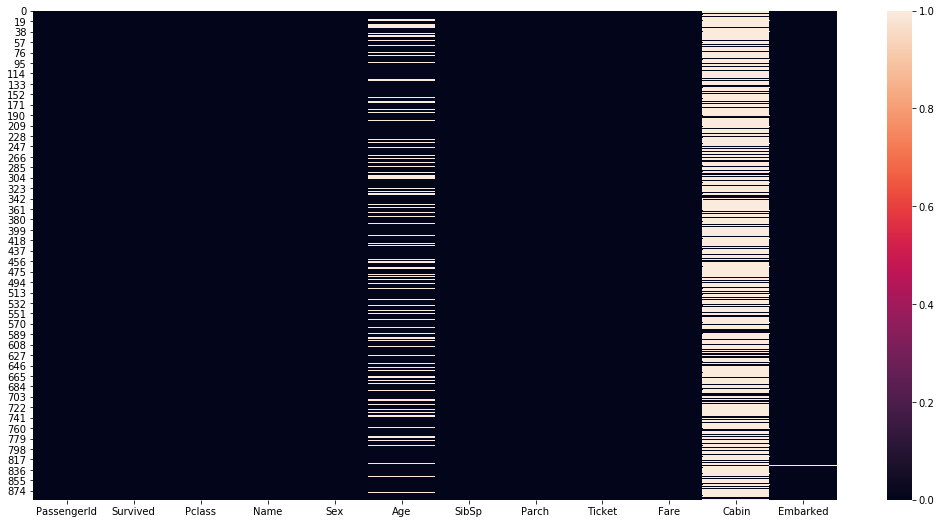

In [6]:
fig = plt.gcf()
fig.set_size_inches((18,9))
sns.heatmap(titanic.isnull())

In [7]:
titanic.Age.fillna(titanic.Age.median() , inplace = True)

In [8]:
titanic.Cabin = titanic.Cabin.astype('category')

In [9]:
titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: category
Categories (147, object): [A10, A14, A16, A19, ..., F38, F4, G6, T]

In [10]:
titanic.Cabin = titanic.Cabin.interpolate(method = 'ffill')

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        890 non-null    category
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 84.6+ KB


In [12]:
titanic.Embarked = titanic.Embarked.interpolate(method = 'ffill')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

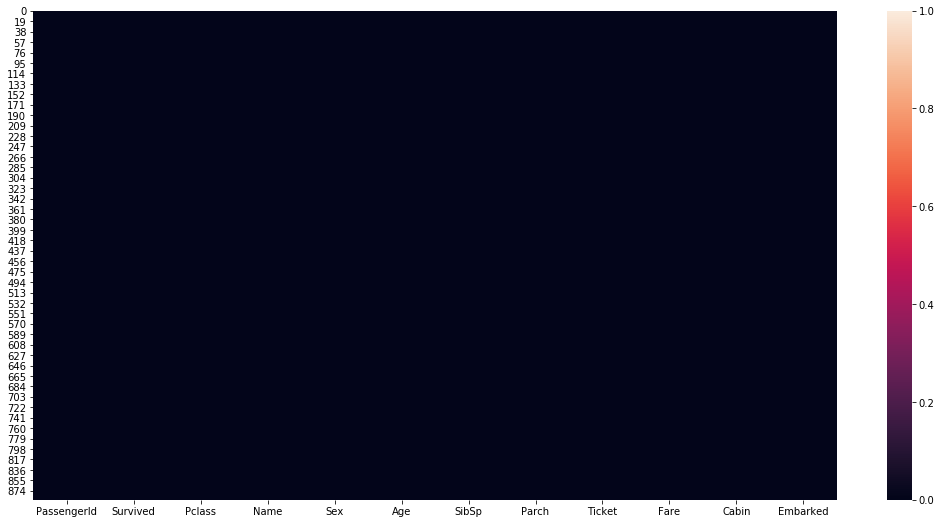

In [13]:
fig = plt.gcf()
fig.set_size_inches((18,9))
sns.heatmap(titanic.isnull())

# 4. Exploring and visualizing data

**a**

In [14]:
titanic[titanic.Survived == 0].Survived.count()

549

In [15]:
titanic[titanic.Survived == 1].Survived.count()

342

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<BarContainer object of 2 artists>

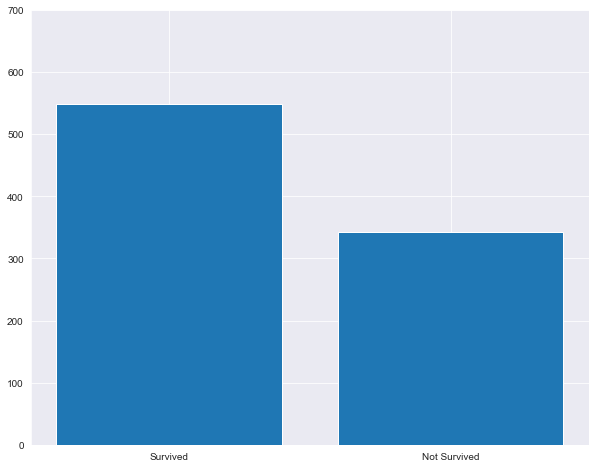

In [16]:
sns.set_style('darkgrid')
ax = plt.gcf()
ax.set_size_inches((10,8))
plt.ylim([0,700])
plt.bar(['Survived' , 'Not Survived'] , [titanic[titanic.Survived == 0].Survived.count() , titanic[titanic.Survived == 1].Survived.count()])

**b**

In [17]:
[titanic.Pclass.value_counts()]

[3    491
 1    216
 2    184
 Name: Pclass, dtype: int64]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

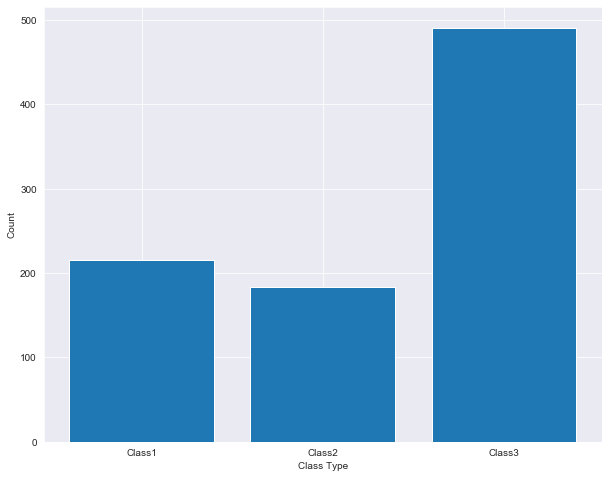

In [18]:
sns.set_style('darkgrid')
ax = plt.gcf()
ax.set_size_inches((10,8))
plt.bar(['Class' + str(i) for i in [1,2,3]] , [216 , 184 , 491])
plt.xlabel("Class Type")
plt.ylabel("Count")

**c**

In [19]:
titanic.shape

(891, 12)

In [20]:
titanic[titanic.Sex == 'male'].shape[0]

577

In [21]:
titanic[titanic.Sex == 'female'].shape[0]

314

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

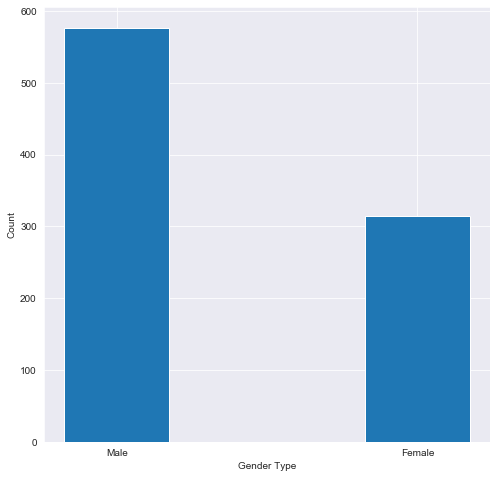

In [22]:
sns.set_style('darkgrid')
ax = plt.gcf()
ax.set_size_inches((8,8))
plt.bar(['Male' , 'Female'] , [titanic[titanic.Sex == 'male'].shape[0] , titanic[titanic.Sex == 'female'].shape[0]] , width = 0.35)
plt.xlabel("Gender Type")
plt.ylabel("Count")

**d**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

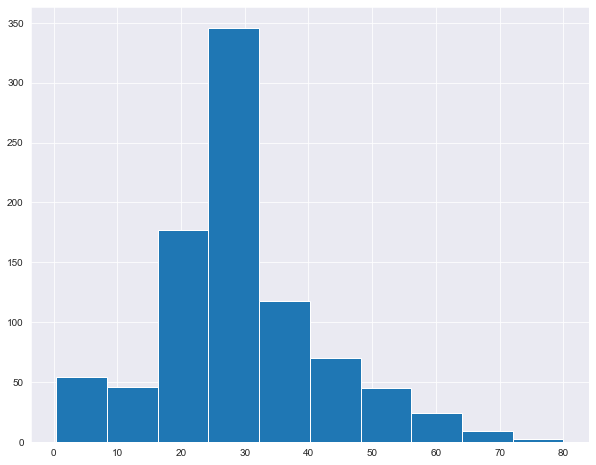

In [23]:
ax = plt.gcf()
ax.set_size_inches((10,8))
plt.hist(titanic.Age)
plt.show()

**e**

In [24]:
titanic.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [25]:
titanic.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

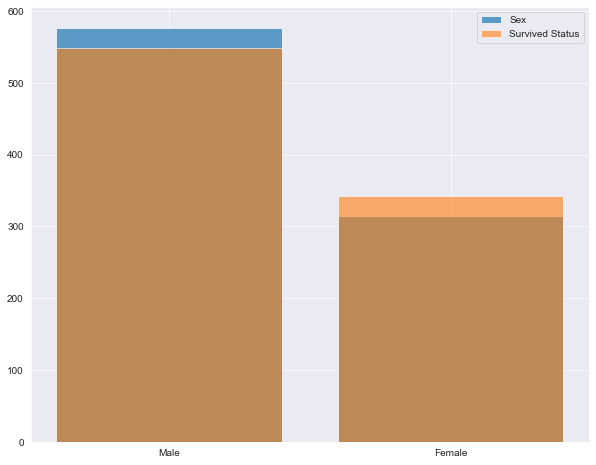

In [26]:
ax = plt.gcf()
ax.set_size_inches((10 , 8))
plt.bar(['Male' , 'Female'] , [titanic[titanic.Sex == 'male'].shape[0] , titanic[titanic.Sex == 'female'].shape[0]] ,alpha = 0.7 , label = 'Sex')
plt.bar(['Male' , 'Female'] ,[titanic[titanic.Survived == 0].shape[0] , titanic[titanic.Survived == 1].shape[0]] , alpha = 0.6 , label = 'Survived Status')
plt.legend()
plt.show()

**f**

In [27]:
df = titanic[['Age' , 'Sex']]

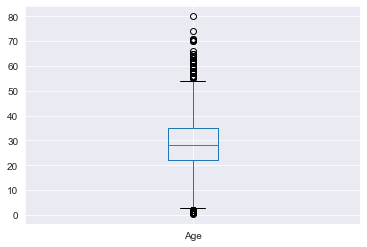

In [28]:
df.plot.box(grid = True)

# 5. Visualization

In [29]:
store = pd.read_excel('super_store.xls')

<IPython.core.display.Javascript object>

In [30]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [31]:
sub_category_dict = dict(store['Sub-Category'].value_counts())

In [32]:
sub_category_dict

{'Binders': 1523,
 'Paper': 1370,
 'Furnishings': 957,
 'Phones': 889,
 'Storage': 846,
 'Art': 796,
 'Accessories': 775,
 'Chairs': 617,
 'Appliances': 466,
 'Labels': 364,
 'Tables': 319,
 'Envelopes': 254,
 'Bookcases': 228,
 'Fasteners': 217,
 'Supplies': 190,
 'Machines': 115,
 'Copiers': 68}

In [33]:
store.Profit

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

In [34]:
output_dict = {}

for sub_category in sub_category_dict.keys():
    
    output_dict[sub_category] = store[store['Sub-Category'] == sub_category].Profit.sum()
    
output_dict

{'Binders': 30221.76329999999,
 'Paper': 34053.5693,
 'Furnishings': 13059.1436,
 'Phones': 44515.730599999995,
 'Storage': 21278.826399999994,
 'Art': 6527.787,
 'Accessories': 41936.6357,
 'Chairs': 26590.16629999999,
 'Appliances': 18138.005399999995,
 'Labels': 5546.254,
 'Tables': -17725.481100000005,
 'Envelopes': 6964.176699999999,
 'Bookcases': -3472.556000000003,
 'Fasteners': 949.5182,
 'Supplies': -1189.0995000000005,
 'Machines': 3384.756899999989,
 'Copiers': 55617.8249}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x576 with 0 Axes>

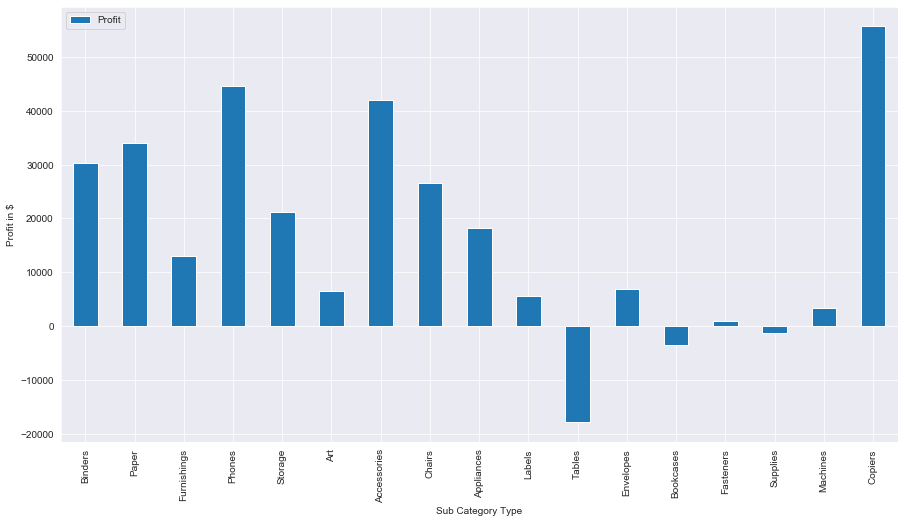

In [35]:
# Profit Based on Subcategiries data frame
subcategory_df = pd.DataFrame(output_dict , index = ['Profit']).T
ax = plt.gcf()
ax.set_size_inches((10 , 8))
subcategory_df.plot(kind = 'bar' , figsize = (15 , 8))
plt.xlabel('Sub Category Type')
plt.ylabel('Profit in $')
plt.show()

**b**

In [36]:
store['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [37]:
store_without_furnishing_df = store[store['Sub-Category'] != 'Furnishings']

In [38]:
store_without_furnishing_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.00,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.00,55.6470
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


**C**

In [39]:
store_without_furnishing_df.sort_values(by = ['Sub-Category'] , ascending=False)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5870,5871,CA-2016-128223,2016-06-14,2016-06-14,Same Day,EB-13705,Ed Braxton,Corporate,United States,Anaheim,...,92804,West,FUR-TA-10001771,Furniture,Tables,"Bush Cubix Conference Tables, Fully Assembled",1293.488,7,0.2,80.8430
9059,9060,CA-2016-132304,2016-06-14,2016-06-18,Standard Class,AR-10825,Anthony Rawles,Corporate,United States,Seattle,...,98103,West,FUR-TA-10004619,Furniture,Tables,Hon Non-Folding Utility Tables,1115.170,7,0.0,334.5510
1395,1396,US-2017-117247,2017-10-09,2017-10-14,Standard Class,CK-12760,Cyma Kinney,Corporate,United States,Aurora,...,60505,Central,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,66.645,3,0.5,-42.6528
1402,1403,US-2016-161396,2016-04-19,2016-04-25,Standard Class,GM-14455,Gary Mitchum,Home Office,United States,Columbus,...,43229,East,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",205.176,2,0.4,-58.1332
1405,1406,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Shirley Daniels,Home Office,United States,Philadelphia,...,19143,East,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,154.764,3,0.4,-36.1116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,5389,CA-2017-164707,2017-02-18,2017-02-21,Second Class,CV-12805,Cynthia Voltz,Corporate,United States,Los Angeles,...,90045,West,TEC-AC-10004864,Technology,Accessories,Memorex Micro Travel Drive 32 GB,109.530,3,0.0,47.0979
5375,5376,CA-2017-134152,2017-05-27,2017-05-31,Standard Class,RP-19855,Roy Phan,Corporate,United States,Seattle,...,98103,West,TEC-AC-10004510,Technology,Accessories,Logitech Desktop MK120 Mouse and keyboard Combo,98.160,6,0.0,9.8160
5357,5358,CA-2014-150490,2014-08-05,2014-08-11,Standard Class,SS-20590,Sonia Sunley,Consumer,United States,San Francisco,...,94122,West,TEC-AC-10004510,Technology,Accessories,Logitech Desktop MK120 Mouse and keyboard Combo,16.360,1,0.0,1.6360
5344,5345,CA-2015-112053,2015-10-11,2015-10-13,Second Class,SH-20395,Shahid Hopkins,Consumer,United States,Rochester,...,14609,East,TEC-AC-10002550,Technology,Accessories,Memorex 25GB 6X Branded Blu-Ray Recordable Dis...,31.950,1,0.0,2.2365


**D**

In [40]:
category_dict = dict(store_without_furnishing_df['Category'].value_counts())


output_dict = {}

for category in category_dict.keys():
    
    output_dict[category] = store_without_furnishing_df[store_without_furnishing_df['Category'] == category].Profit.sum()
    
output_dict

{'Office Supplies': 122490.80079999998,
 'Technology': 145454.94809999998,
 'Furniture': 5392.129199999985}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

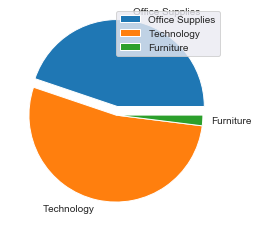

In [41]:
sns.set_style('darkgrid')
plt.pie( output_dict.values() , labels = output_dict.keys() , explode = (0.1,0.0,0.0))
plt.legend()
plt.show()

**E**

In [42]:
store_without_furnishing_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [43]:
store_without_furnishing_df['Year'] = [str(i).split('-')[0] for i in store_without_furnishing_df['Ship Date']]

C:\Users\kmuthu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
store_without_furnishing_df.Year

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9987    2017
9988    2017
9991    2017
9992    2017
9993    2017
Name: Year, Length: 9037, dtype: object

In [45]:
year_dict = dict(store_without_furnishing_df['Year'].value_counts())


output_dict = {}

for year in year_dict.keys():
    
    output_dict[year] = store_without_furnishing_df[store_without_furnishing_df['Year'] == year].Profit.sum()
    
output_dict

{'2017': 88274.36479999998,
 '2016': 79047.80829999999,
 '2015': 59836.38939999999,
 '2014': 45301.71619999998,
 '2018': 877.5994}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

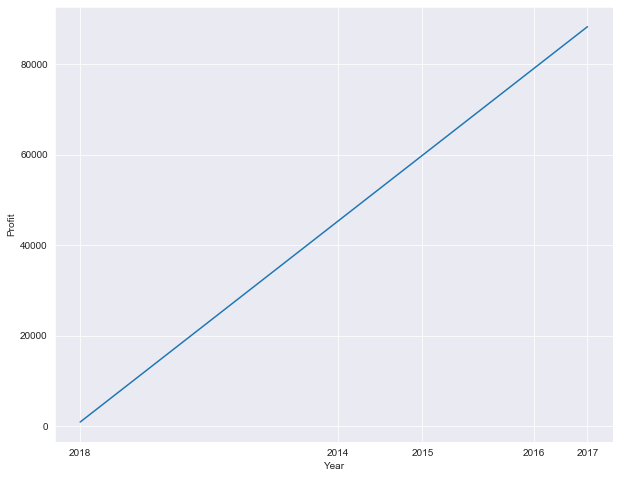

In [46]:
ax = plt.gcf()
ax.set_size_inches((10,8))
plt.plot(list(output_dict.values()) , list(output_dict.values()))
plt.xticks(list(output_dict.values()) , list(output_dict.keys()))
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

**F**

In [47]:
l = store_without_furnishing_df.groupby('Customer ID').median().sort_values(by = ['Profit'] , ascending = False).head(10).reset_index()['Customer ID'] 

In [48]:
print('The Top 10 Customer IDs are')
l

The Top 10 Customer IDs are


0    MW-18235
1    TM-21490
2    GH-14485
3    JR-15700
4    TC-21145
5    RS-19765
6    BE-11410
7    SH-20635
8    BE-11335
9    BT-11485
Name: Customer ID, dtype: object

In [49]:
new_list = []
for i in l:
     new_list.append(list(store_without_furnishing_df[store_without_furnishing_df['Customer ID'] == i]['Customer Name']))

In [50]:
new_list

[['Mitch Willingham', 'Mitch Willingham', 'Mitch Willingham'],
 ['Tony Molinari', 'Tony Molinari', 'Tony Molinari'],
 ['Gene Hale'],
 ['Jocasta Rupert'],
 ['Theresa Coyne', 'Theresa Coyne', 'Theresa Coyne'],
 ['Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz',
  'Roland Schwarz'],
 ['Bobby Elias', 'Bobby Elias', 'Bobby Elias', 'Bobby Elias', 'Bobby Elias'],
 ['Stefanie Holloman'],
 ['Bill Eplett',
  'Bill Eplett',
  'Bill Eplett',
  'Bill Eplett',
  'Bill Eplett',
  'Bill Eplett',
  'Bill Eplett'],
 ['Brad Thomas', 'Brad Thomas']]

In [51]:
print('Top 10 Customer Names:\n')
for i in new_list:
    print(i[0])

Top 10 Customer Names:

Mitch Willingham
Tony Molinari
Gene Hale
Jocasta Rupert
Theresa Coyne
Roland Schwarz
Bobby Elias
Stefanie Holloman
Bill Eplett
Brad Thomas


**G**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

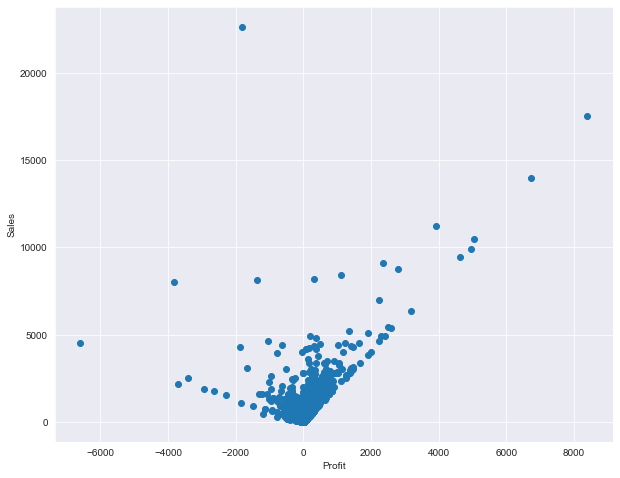

In [52]:
ax = plt.gcf()
ax.set_size_inches((10,8))
plt.scatter(store_without_furnishing_df.Profit , store_without_furnishing_df.Sales)
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

# Joins in Data Frame

In [53]:
dept = pd.DataFrame({'Deptno' : [123 , 345 , 678] , 'Dname' : ['CSE' , 'IT' , 'ECE'] , 'Loc' : ['KSR' , 'KONGU' , 'SRM']} )

<IPython.core.display.Javascript object>

In [54]:
dept

,Deptno,Dname,Loc
0,123,CSE,KSR
1,345,IT,KONGU
2,678,ECE,SRM


In [55]:
emp = pd.DataFrame({'Deptno' : [123 , 345 , 678] , 'Eno' : [ 444, 555 , 666] , 'Sal' : [120000 , 250000 , 230000]} )

<IPython.core.display.Javascript object>

In [56]:
emp

,Deptno,Eno,Sal
0,123,444,120000
1,345,555,250000
2,678,666,230000


In [57]:
pd.merge(dept , emp , on = 'Deptno' , how = 'inner' )

<IPython.core.display.Javascript object>

,Deptno,Dname,Loc,Eno,Sal
0,123,CSE,KSR,444,120000
1,345,IT,KONGU,555,250000
2,678,ECE,SRM,666,230000


In [58]:
pd.merge(dept , emp , on = 'Deptno' , how = 'outer' )

<IPython.core.display.Javascript object>

,Deptno,Dname,Loc,Eno,Sal
0,123,CSE,KSR,444,120000
1,345,IT,KONGU,555,250000
2,678,ECE,SRM,666,230000


In [59]:
pd.merge(dept , emp , on = 'Deptno' , how = 'left' )

<IPython.core.display.Javascript object>

,Deptno,Dname,Loc,Eno,Sal
0,123,CSE,KSR,444,120000
1,345,IT,KONGU,555,250000
2,678,ECE,SRM,666,230000


In [60]:
pd.merge(dept , emp , on = 'Deptno' , how = 'right' )

<IPython.core.display.Javascript object>

,Deptno,Dname,Loc,Eno,Sal
0,123,CSE,KSR,444,120000
1,345,IT,KONGU,555,250000
2,678,ECE,SRM,666,230000


# 7. Descriptive and Inferential Statistics:

In [61]:
#7 

In [62]:
mean = 177
std = 10
X = 200

In [63]:
z = (X - mean) / std
z

2.3

**Z table value for 2.3 is  0.4893**

In [64]:
probability = 1 - 0.4893

In [65]:
print('Probability of Having more than 200cm height is : ' , probability)

Probability of Having more than 200cm height is :  0.5106999999999999


In [66]:
# 8

In [67]:
mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
       33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

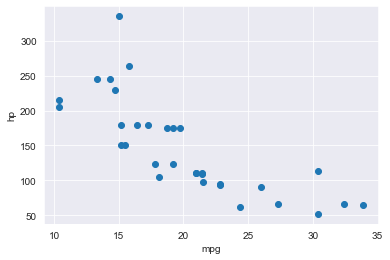

In [68]:
plt.scatter(mpg , hp)
plt.xlabel('mpg')
plt.ylabel('hp')
plt.show()

**MPG and HP has negative correlation**

In [69]:
#9

In [70]:
from scipy.stats import ttest_ind

In [71]:
class1_score = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])

class2_score = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
ttest_ind(class1_score , class2_score)

Ttest_indResult(statistic=-5.458195056848408, pvalue=3.482072285015316e-05)

The smaller the t score the more similarity we have

In [73]:
# 10

In [74]:
class_mark = 53
national_mean = 60
national_standard_deviation = 3

In [75]:
z = (class_mark - national_mean) / national_standard_deviation

In [76]:
z

-2.3333333333333335

**Z Score is -2.3 , So the Null Hypothesis is False**

In [77]:
import pandas_profiling

In [78]:
# 11

In [79]:
trees = pd.read_csv('trees.csv')
trees.head()

<IPython.core.display.Javascript object>

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [80]:
trees[['Girth' , 'Volume']].profile_report()

C:\Users\kmuthu2\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


C:\Users\kmuthu2\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


**The Volume And girth are Highly Correlated**

In [81]:
from scipy.stats import pearsonr

In [82]:
pearson_correlation , p_value = pearsonr(trees.Girth , trees.Volume)

In [83]:
pearson_correlation

0.9671193682556305

In [84]:
#12

In [85]:
ttest_ind(trees.Girth , trees.Volume)

Ttest_indResult(statistic=-5.6302684259801605, pvalue=5.044051066140026e-07)

In [86]:
# T Value is negative , so no statistical significance

# 8. Machine Learning Algorithms

In [87]:
#12

In [88]:
auto = pd.read_excel('automobile.xlsm')
auto.head()

<IPython.core.display.Javascript object>

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [89]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [90]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<IPython.core.display.Javascript object>

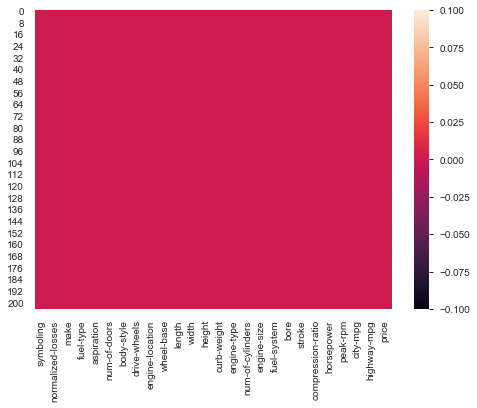

In [91]:
sns.heatmap(auto.isnull())

In [92]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [93]:
auto['normalized-losses'].replace('?' , '164' , inplace = True)

In [94]:
auto['normalized-losses'].value_counts()

164    41
161    11
91      8
150     7
128     6
104     6
134     6
65      5
95      5
103     5
85      5
168     5
102     5
94      5
74      5
122     4
93      4
148     4
106     4
118     4
137     3
154     3
83      3
125     3
115     3
101     3
87      2
164     2
129     2
119     2
145     2
113     2
153     2
110     2
108     2
158     2
89      2
81      2
188     2
192     2
194     2
197     2
231     1
186     1
98      1
77      1
142     1
78      1
121     1
256     1
90      1
107     1
Name: normalized-losses, dtype: int64

In [95]:
auto['normalized-losses'] = auto['normalized-losses'].astype('int')

In [96]:
auto.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [97]:
auto.make = auto.make.astype('category')

In [98]:
auto['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [99]:
auto['fuel-type'] = auto['fuel-type'].astype('category')

In [100]:
auto.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [101]:
auto['aspiration'] = auto['aspiration'].astype('category')

In [102]:
auto['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [103]:
auto['num-of-doors'] = auto['num-of-doors'].astype('category')

In [104]:
auto['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [105]:
auto['body-style'] = auto['body-style'].astype('category')

In [106]:
auto['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [107]:
auto['drive-wheels'] = auto['drive-wheels'].astype('category')

In [108]:
auto['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [109]:
auto['engine-location'] = auto['engine-location'].astype('category')

In [110]:
auto['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [111]:
auto['engine-type'] = auto['engine-type'].astype('category')

In [112]:
auto['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [113]:
auto['num-of-cylinders'] = auto['num-of-cylinders'].astype('category')

In [114]:
auto['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [115]:
auto['fuel-system'] = auto['fuel-system'].astype('category')

In [116]:
auto.bore.value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.54     6
3.39     6
3.58     6
3.05     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.74     3
3.59     3
3.63     2
3.33     2
3.8      2
3.47     2
3.94     2
3.5      2
3.13     2
3.24     2
3.76     1
2.99     1
3.08     1
3.6      1
2.54     1
2.92     1
3.34     1
2.68     1
3.61     1
Name: bore, dtype: int64

In [117]:
auto['bore'].replace('?' , '3.62' , inplace = True)

In [118]:
auto['bore'] = auto['bore'].astype('float')

In [119]:
auto['stroke'].replace('?' , '3.4 ' , inplace = True)

In [120]:
auto['stroke'].value_counts()

3.4     20
3.03    14
3.15    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.07     6
3.5      6
3.41     6
3.27     6
3.19     6
3.11     6
3.58     6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
3.4      4
3.9      3
2.9      3
2.68     2
4.17     2
2.19     2
3.1      2
3.08     2
2.8      2
2.87     1
3.21     1
2.07     1
3.12     1
2.36     1
2.76     1
3.16     1
Name: stroke, dtype: int64

In [121]:
auto['stroke'] = auto['stroke'].astype('float')

In [122]:
auto['horsepower'].replace('?' , '68' , inplace = True)

In [123]:
auto.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
101     6
88      6
62      6
160     6
76      5
84      5
97      5
102     5
145     5
82      5
123     4
92      4
111     4
86      4
73      3
121     3
207     3
85      3
152     3
90      3
182     3
156     2
176     2
184     2
52      2
155     2
56      2
162     2
161     2
94      2
100     2
112     2
68      2
143     1
154     1
142     1
140     1
135     1
200     1
72      1
134     1
175     1
55      1
58      1
60      1
48      1
64      1
106     1
78      1
288     1
115     1
120     1
262     1
Name: horsepower, dtype: int64

In [124]:
auto.horsepower = auto.horsepower.astype('int')

In [125]:
auto['peak-rpm'].replace('?' , '5500' , inplace = True)

In [126]:
auto['peak-rpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
4500     7
5250     7
5800     7
4150     5
4200     5
4350     4
4750     4
4400     3
4250     3
5100     3
5900     3
5500     2
6600     2
5300     1
4650     1
4900     1
5750     1
5600     1
Name: peak-rpm, dtype: int64

In [127]:
auto['peak-rpm'] = auto['peak-rpm'].astype('int')

In [128]:
auto.price.value_counts()

?        4
9279     2
8921     2
6229     2
7775     2
        ..
7053     1
12964    1
16430    1
7126     1
40960    1
Name: price, Length: 187, dtype: int64

In [129]:
auto['price'].replace('?' , '8921' , inplace = True)

In [130]:
auto['price'] = auto['price'].astype('int')

In [131]:
df_auto = pd.get_dummies(auto)

<IPython.core.display.Javascript object>

In [132]:
df_auto

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,164,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(df_auto.drop('price' , axis = 1) , df_auto.price , test_size=0.20)

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lin_reg = LinearRegression()

In [137]:
lin_reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_pred = lin_reg.predict(X_test)

In [139]:
from sklearn.metrics import r2_score

In [140]:
r2_score_of_auto = r2_score(y_test , y_pred)

In [141]:
print('R2 Score is :',r2_score_of_auto)

R2 Score is : 0.760001579589966


In [142]:
#13

In [143]:
pima = pd.read_excel('pima_indian.xlsm')

<IPython.core.display.Javascript object>

In [144]:
pima.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [146]:
pima.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [147]:
# No Null values and all data is numeric so proceeding building model

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
X_train, X_test, y_train, y_test = train_test_split(pima.drop('Class variable (0 or 1)' , axis = 1) , pima['Class variable (0 or 1)'])

In [150]:
log_reg = LogisticRegression()

In [151]:
log_reg.fit(X_train ,y_train)

C:\Users\kmuthu2\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred = log_reg.predict(X_test)

In [153]:
from sklearn.metrics import confusion_matrix , classification_report

In [154]:
confusion_matrix(y_test , y_pred)

array([[108,  17],
       [ 28,  39]], dtype=int64)

In [155]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       125
           1       0.70      0.58      0.63        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



In [156]:
#14

In [157]:
hotel = pd.read_excel('hotel.xlsm')

<IPython.core.display.Javascript object>

In [158]:
hotel.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [159]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   address   102 non-null    object 
 1   lat       102 non-null    float64
 2   lon       102 non-null    float64
 3   title     102 non-null    object 
 4   district  102 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.1+ KB


In [160]:
hotel_first_df = hotel[['address' , 'title']]

In [161]:
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
count = CountVectorizer()

In [163]:
bow = count.fit_transform(hotel_first_df.address)

bow.toarray()

feature_names = count.get_feature_names()

df1 = pd.DataFrame(bow.toarray(), columns=feature_names)
df1

<IPython.core.display.Javascript object>

,10,104,10412,10441,10444,10446,10450,10454,10462,10464,...,yijiang,yinguang,yongji,you,youya,zhang,zhifu,zhong,zhongshan,zhongxiao
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
bow = count.fit_transform(hotel_first_df.title)

bow.toarray()

feature_names = count.get_feature_names()

df2 = pd.DataFrame(bow.toarray(), columns=feature_names)
df2

<IPython.core.display.Javascript object>

,293,32,aloft,amba,ambassador,ambience,an,apartment,arena,ark,...,westin,wish,wonstar,world,xinyi,yangming,yo,yomi,yue,zhongshan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
hotel_first_df = pd.concat([df1 , df2] , axis = 1)

<IPython.core.display.Javascript object>

In [166]:
hotel_second_df = hotel[['lat' , 'lon'  , 'district']]

In [167]:
hotel_second_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lat       102 non-null    float64
 1   lon       102 non-null    float64
 2   district  102 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [168]:
hotel_second_df.district.value_counts()

Zhongshan    71
Beitou       18
Xinyi        13
Name: district, dtype: int64

In [169]:
hotel_second_df.district = hotel_second_df.district.astype('category')

C:\Users\kmuthu2\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [170]:
hotel_second_df = pd.get_dummies(hotel_second_df)

<IPython.core.display.Javascript object>

In [171]:
hotel_second_df

,lat,lon,district_Beitou,district_Xinyi,district_Zhongshan
0,25.137793,121.51495,1,0,0
1,25.057854,121.52409,0,0,1
2,25.137163,121.50544,1,0,0
3,25.039248,121.56741,0,1,0
4,25.052057,121.52831,0,0,1
...,...,...,...,...,...
97,25.054157,121.52435,0,0,1
98,25.040604,121.56546,0,1,0
99,25.053720,121.52277,0,0,1
100,25.062574,121.52999,0,0,1


In [172]:
df = pd.concat([hotel_first_df , hotel_second_df] , axis = 1)

<IPython.core.display.Javascript object>

In [173]:
X = df.drop(['district_Beitou' ,'district_Xinyi','district_Zhongshan'] , axis = 1)

In [174]:
y = hotel.district.astype('category')

In [175]:
from sklearn.cluster import KMeans

In [176]:
df.isnull().sum()

10                    0
104                   0
10412                 0
10441                 0
10444                 0
                     ..
lat                   0
lon                   0
district_Beitou       0
district_Xinyi        0
district_Zhongshan    0
Length: 387, dtype: int64

In [177]:
y.value_counts()

Zhongshan    71
Beitou       18
Xinyi        13
Name: district, dtype: int64

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X , y )

In [179]:
kmeans = KMeans(n_clusters=3 , max_iter= 600 , algorithm='auto')

In [180]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [181]:
kmeans.predict(X_test)

array([2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1,
       2, 1, 2, 1])